In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# height, width = 200, 100
height, width = 224, 224
size = (height, width)

# train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_data_path = "../data/raw/images/training"
testing_data_path = "../data/raw/images/testing"

train_generator = train_datagen.flow_from_directory(training_data_path, target_size=size,batch_size=32,
                                                    class_mode='binary', subset='training')

validation_generator = train_datagen.flow_from_directory(training_data_path, target_size=size,
                                                         batch_size=32, class_mode='binary',subset='validation')

test_generator = test_datagen.flow_from_directory(testing_data_path, shuffle=True, target_size=size, batch_size=32,
                                                  class_mode='binary')

2023-09-14 03:14:53.377779: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 1914 images belonging to 2 classes.
Found 478 images belonging to 2 classes.
Found 597 images belonging to 2 classes.


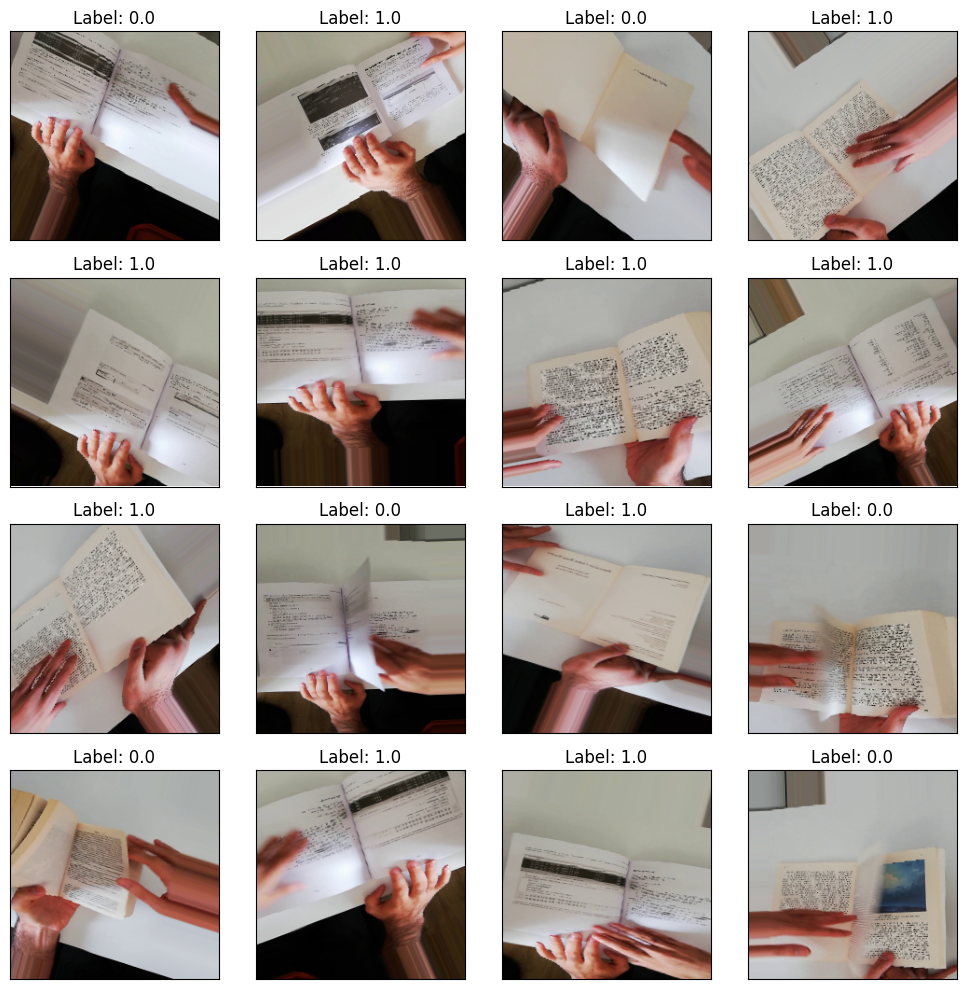

In [2]:
import matplotlib.pyplot as plt

# Get a batch of images and labels from the train_generator
x_batch, y_batch = next(train_generator)

# Define the number of images to display
num_images_to_display = 16

# Create a grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Loop over the axes to plot each image
for i, ax in enumerate(axes.flat):
    # Display an image at the i-th position
    ax.imshow(x_batch[i])
    
    # Display the label as the title
    ax.set_title(f'Label: {y_batch[i]}')
    
    # Hide grid lines
    ax.grid(False)
    
    # Hide axes ticks
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust layout so plots are not overlapping
plt.tight_layout()

# Show the plot
plt.show()


In [4]:
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [19]:
custom_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),  # Dropout layer to reduce overfitting
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

custom_model.compile(
    loss='binary_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy', tfa.metrics.F1Score(num_classes=1, average='micro', threshold=0.5)]
)


In [ ]:
history = custom_model.fit(train_generator, epochs=100, validation_data=validation_generator)

Epoch 1/100
60/60 [==============================] - 248s 4s/step - loss: 0.7080 - accuracy: 0.5063 - f1_score: 0.6251 - val_loss: 0.6918 - val_accuracy: 0.5356 - val_f1_score: 0.6891
Epoch 2/100
60/60 [==============================] - 239s 4s/step - loss: 0.6796 - accuracy: 0.5653 - f1_score: 0.6364 - val_loss: 0.6929 - val_accuracy: 0.5230 - val_f1_score: 0.5309
Epoch 3/100
60/60 [==============================] - 206s 3s/step - loss: 0.6533 - accuracy: 0.6243 - f1_score: 0.6664 - val_loss: 0.7242 - val_accuracy: 0.5649 - val_f1_score: 0.6770
Epoch 4/100
60/60 [==============================] - 208s 3s/step - loss: 0.6497 - accuracy: 0.6290 - f1_score: 0.6722 - val_loss: 0.7378 - val_accuracy: 0.4728 - val_f1_score: 0.3971
Epoch 5/100
60/60 [==============================] - 211s 4s/step - loss: 0.6293 - accuracy: 0.6473 - f1_score: 0.6844 - val_loss: 0.7018 - val_accuracy: 0.5837 - val_f1_score: 0.6280
Epoch 6/100
60/60 [==============================] - 206s 3s/step - loss: 0.6143

60/60 [==============================] - 216s 4s/step - loss: 0.2907 - accuracy: 0.8835 - f1_score: 0.8892 - val_loss: 0.4263 - val_accuracy: 0.8159 - val_f1_score: 0.8358
Epoch 46/100
60/60 [==============================] - 218s 4s/step - loss: 0.2856 - accuracy: 0.8809 - f1_score: 0.8872 - val_loss: 0.4563 - val_accuracy: 0.7929 - val_f1_score: 0.8210
Epoch 47/100
60/60 [==============================] - 292s 5s/step - loss: 0.2839 - accuracy: 0.8892 - f1_score: 0.8950 - val_loss: 0.4418 - val_accuracy: 0.7845 - val_f1_score: 0.7785
Epoch 48/100
60/60 [==============================] - 252s 4s/step - loss: 0.2887 - accuracy: 0.8751 - f1_score: 0.8819 - val_loss: 0.4809 - val_accuracy: 0.7720 - val_f1_score: 0.7361
Epoch 49/100
60/60 [==============================] - 270s 4s/step - loss: 0.3276 - accuracy: 0.8537 - f1_score: 0.8614 - val_loss: 0.4154 - val_accuracy: 0.8013 - val_f1_score: 0.8041
Epoch 50/100
60/60 [==============================] - 304s 5s/step - loss: 0.2783 - accu

60/60 [==============================] - 211s 4s/step - loss: 0.1959 - accuracy: 0.9269 - f1_score: 0.9299 - val_loss: 0.3325 - val_accuracy: 0.8536 - val_f1_score: 0.8523
Epoch 90/100
60/60 [==============================] - 220s 4s/step - loss: 0.1851 - accuracy: 0.9248 - f1_score: 0.9275 - val_loss: 0.4550 - val_accuracy: 0.8347 - val_f1_score: 0.8607
Epoch 91/100
60/60 [==============================] - 222s 4s/step - loss: 0.1828 - accuracy: 0.9347 - f1_score: 0.9375 - val_loss: 0.4260 - val_accuracy: 0.8515 - val_f1_score: 0.8716
Epoch 92/100
60/60 [==============================] - 215s 4s/step - loss: 0.1928 - accuracy: 0.9143 - f1_score: 0.9186 - val_loss: 0.4460 - val_accuracy: 0.8515 - val_f1_score: 0.8707
Epoch 93/100
60/60 [==============================] - 211s 3s/step - loss: 0.1792 - accuracy: 0.9352 - f1_score: 0.9378 - val_loss: 0.3335 - val_accuracy: 0.8619 - val_f1_score: 0.8745
Epoch 94/100
60/60 [==============================] - 215s 4s/step - loss: 0.2025 - accu

In [6]:
test_loss, test_accuracy, test_f1 = custom_model.evaluate(test_generator)

print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test F1 score: {test_f1:.4f}')

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
19/19 [==============================] - 19s 915ms/step - loss: 0.6935 - f1_score: 0.0190
Test loss: 0.6935
Test F1 score: 0.0190


In [25]:
custom_model.save('Custom_MonReader.h5')

In [6]:
import tensorflow as tf
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(height, width, 3))

# Freeze the base model's layers
base_model.trainable = False

# Build the new model using the base model and adding new top layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with F1 score as a metric
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
#     optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy', tfa.metrics.F1Score(num_classes=1, average='micro', threshold=0.5)]
)

# Train the model for a fixed number of epochs
history = model.fit(
    train_generator,
    epochs=30, # Adjust the number of epochs
    validation_data=validation_generator,
)

# Save the model
model.save('ResNet_MonReader.h5')

Epoch 1/30
60/60 [==============================] - 359s 6s/step - loss: 0.7709 - accuracy: 0.5110 - f1_score: 0.5325 - val_loss: 0.6934 - val_accuracy: 0.5126 - val_f1_score: 0.5011
Epoch 2/30
60/60 [==============================] - 335s 6s/step - loss: 0.7365 - accuracy: 0.5078 - f1_score: 0.5281 - val_loss: 0.6939 - val_accuracy: 0.4791 - val_f1_score: 0.6003
Epoch 3/30
60/60 [==============================] - 340s 6s/step - loss: 0.7257 - accuracy: 0.5099 - f1_score: 0.5388 - val_loss: 0.6986 - val_accuracy: 0.4854 - val_f1_score: 0.0000e+00
Epoch 4/30
60/60 [==============================] - 350s 6s/step - loss: 0.7226 - accuracy: 0.4875 - f1_score: 0.5160 - val_loss: 0.6901 - val_accuracy: 0.5105 - val_f1_score: 0.6750
Epoch 5/30
60/60 [==============================] - 346s 6s/step - loss: 0.7113 - accuracy: 0.4922 - f1_score: 0.5150 - val_loss: 0.6928 - val_accuracy: 0.5188 - val_f1_score: 0.6048
Epoch 6/30
60/60 [==============================] - 339s 6s/step - loss: 0.6968 -

In [18]:
resnet_model = tf.keras.models.load_model('ResNet_MonReader.h5', custom_objects={'F1Score': tfa.metrics.F1Score})
test_loss, test_accuracy, test_f1 = resnet_model.evaluate(test_generator)

19/19 [==============================] - 74s 4s/step - loss: 0.6900 - accuracy: 0.5159 - f1_score: 0.6705


In [5]:
# Load the pre-trained MobileNet model without the top layers
base_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(height, width, 3))

# Freeze the base model's layers
base_model.trainable = False

# Build the new model using the base model and adding new top layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with F1 score as a metric
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy', tfa.metrics.F1Score(num_classes=1, average='micro', threshold=0.5)]
)

# Train the model for a fixed number of epochs
history = model.fit(
    train_generator,
    epochs=30, # Adjust the number of epochs
    validation_data=validation_generator,
)

# Save the model
model.save('MobileNet_MonReader.h5')

Epoch 1/30
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
60/60 [==============================] - 229s 4s/step - loss: 0.7286 - accuracy: 0.5967 - f1_score: 0.6097 - val_loss: 0.6068 - val_accuracy: 0.6757 - val_f1_score: 0.7323
Epoch 2/30
60/60 [==============================] - 218s 4s/step - loss: 0.5853 - accuracy: 0.6839 - f1_score: 0.6940 - val_loss: 0.5843 - val_accuracy: 0.6925 - val_f1_score: 0.7538
Epoch 3/30
60/60 [==============================] - 199s 3s/step - loss: 0.5146 - accuracy: 0.7529 - f1_score: 0.7639 - val_loss: 0.5090 - val_accuracy: 0.7594 - val_f1_score: 0.7695
Epoch 4/30
60/60 [==============================] - 214s 4s/step - loss: 0.4731 - accuracy: 0.7863 - f1_score: 0.7988 - val_loss: 0.5356 - val_accuracy: 0.7531 - val_f1_score: 0.7839
Epoch 5/30
60/60 [==============================] - 210s 3s/step - 

In [9]:
mobile_net_model = tf.keras.models.load_model('MobileNet_MonReader.h5', custom_objects={'F1Score': tfa.metrics.F1Score})

In [10]:
history = mobile_net_model.fit(
    train_generator,
    epochs=30, # Adjust the number of epochs
    validation_data=validation_generator,
)

Epoch 1/30
60/60 [==============================] - 176s 3s/step - loss: 0.2269 - accuracy: 0.9122 - f1_score: 0.9159 - val_loss: 0.3849 - val_accuracy: 0.8180 - val_f1_score: 0.8257
Epoch 2/30
60/60 [==============================] - 175s 3s/step - loss: 0.2232 - accuracy: 0.9086 - f1_score: 0.9117 - val_loss: 0.4154 - val_accuracy: 0.7971 - val_f1_score: 0.8102
Epoch 3/30
60/60 [==============================] - 149s 2s/step - loss: 0.2226 - accuracy: 0.9112 - f1_score: 0.9153 - val_loss: 0.4025 - val_accuracy: 0.8285 - val_f1_score: 0.8263
Epoch 4/30
60/60 [==============================] - 179s 3s/step - loss: 0.2290 - accuracy: 0.9075 - f1_score: 0.9111 - val_loss: 0.4099 - val_accuracy: 0.7950 - val_f1_score: 0.8185
Epoch 5/30
60/60 [==============================] - 156s 3s/step - loss: 0.2030 - accuracy: 0.9133 - f1_score: 0.9174 - val_loss: 0.3876 - val_accuracy: 0.8201 - val_f1_score: 0.8230
Epoch 6/30
60/60 [==============================] - 149s 2s/step - loss: 0.2170 - acc

In [11]:
mobile_net_model.save('MobileNet_MonReader.h5')

In [15]:
mobile_net_model = tf.keras.models.load_model('MobileNet_MonReader.h5', custom_objects={'F1Score': tfa.metrics.F1Score})
history = mobile_net_model.fit(
    train_generator,
    epochs=40, # Adjust the number of epochs
    validation_data=validation_generator,
)

Epoch 1/40
60/60 [==============================] - 318s 5s/step - loss: 0.1802 - accuracy: 0.9316 - f1_score: 0.9343 - val_loss: 0.3870 - val_accuracy: 0.8264 - val_f1_score: 0.8323
Epoch 2/40
60/60 [==============================] - 255s 4s/step - loss: 0.1664 - accuracy: 0.9383 - f1_score: 0.9411 - val_loss: 0.4548 - val_accuracy: 0.8054 - val_f1_score: 0.8058
Epoch 3/40
60/60 [==============================] - 243s 4s/step - loss: 0.1694 - accuracy: 0.9347 - f1_score: 0.9372 - val_loss: 0.4298 - val_accuracy: 0.8054 - val_f1_score: 0.8129
Epoch 4/40
60/60 [==============================] - 241s 4s/step - loss: 0.1708 - accuracy: 0.9378 - f1_score: 0.9398 - val_loss: 0.3700 - val_accuracy: 0.8431 - val_f1_score: 0.8460
Epoch 5/40
60/60 [==============================] - 211s 4s/step - loss: 0.1715 - accuracy: 0.9316 - f1_score: 0.9342 - val_loss: 0.3898 - val_accuracy: 0.8096 - val_f1_score: 0.8191
Epoch 6/40
60/60 [==============================] - 159s 3s/step - loss: 0.1519 - acc

In [16]:
mobile_net_model.save('MobileNet_MonReader.h5')

In [17]:
test_loss, test_accuracy, test_f1 = mobile_net_model.evaluate(test_generator)

19/19 [==============================] - 26s 1s/step - loss: 0.0996 - accuracy: 0.9665 - f1_score: 0.9676
